In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn import svm, metrics,preprocessing
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [2]:
# path="/home/sultan/EEG/Source_Level_Analysis/100sam_10ms_clear_all_erp.csv"
# path="/home/sultan/EEG_CP/ERP_samples/Allbase_trig1_25sam_10ms_all_ERPs.csv"
# path="/home/sultan/EEG_CP/ERP_samples/Features_data/Allbase_50sam_10ms_all_ERPs.csv"
# path='/home/sultan/EEG_CP/ERP_samples/Features_data/Baseline_Trig_13_75sam_20ms_all_ERPs.csv'
path="/home/sultan/EEG/Source_Level_Analysis/Baseline_100sam_10ms_clear_all_erp.csv"
dataset =pd.read_csv(path)

### Put the information for figure title

In [3]:
## Put the following information
rs=40;
trig=153;sam=100;win=20;w="withr"; nt=15
## This is the for with replacement
# fti=str(sam)+"samp_"+str(win)+"ms_"+w+str(nt)+"Trig"+str(trig)
## this is the for without replacement
fti=str(sam)+"samp_"+str(win)+"ms_"+w+str(nt)+"_Trig"+str(trig)
fti

'100samp_20ms_withr15_Trig153'

In [4]:
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(Xc)
# y=label_binarize(np.asarray(y),[1,0])

In [5]:
# # np.unique(y,return_counts=True)
# Xct=dataset.iloc[:,1:].values
# Xct.shape

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=rs) 

In [7]:
print X_test.shape, y_test.shape
print X_train.shape

(373, 1428) (373,)
(1490, 1428)


In [8]:
np.unique(y_test)
np.unique(y_test,return_counts=True)

(array([0., 1.]), array([148, 225]))

In [9]:
# nstep=X_train.shape[1]/68
# nstep

In [10]:
# dataset.head(5)

# Whole brain data analysis

In [11]:
nstep=(X_train.shape[1]/68)
k=0;j=68; acgw=[];pmw=[];aucw=[];
for i in range(0,nstep):
    cv=5
    from sklearn.model_selection import GridSearchCV
    parameters = {'kernel':['rbf'], 'C':[1, 10],'gamma':[1/68.0,2/68.0,3/68.0]} 
#     parameters = {'kernel':['rbf'], 'C':[1, 10,20,40,50,80,100],'gamma':[1/68.0,2/68.0,3/68.0]} 
#     parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100],'gamma':[0.01,0.0147,1/68.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
#     print X_train[:,k:j],len(y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgw=np.append(acgw,acc)
    print i*10
    print "Accuracy:",acc
    perf=classification_report(y_test, pred)
    pmw.append(perf)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
    roc_auc=metrics.auc(fpr, tpr)
    roc_auc
    aucw.append(roc_auc)
    print"ROC", roc_auc
    print perf
#     print("Con:",confusion_matrix(y_test, pred))
    print k,j
    k=k+68;j=j+68;
#     scores=clf.cv_results_['mean_test_score']
#     print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))

0
Accuracy: 0.6032171581769437
ROC 0.5
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       148
        1.0       0.60      1.00      0.75       225

avg / total       0.36      0.60      0.45       373

0 68


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


10
Accuracy: 0.6809651474530831
ROC 0.6627177177177177
             precision    recall  f1-score   support

        0.0       0.60      0.57      0.59       148
        1.0       0.73      0.75      0.74       225

avg / total       0.68      0.68      0.68       373

68 136
20
Accuracy: 0.6970509383378016
ROC 0.6621771771771772
             precision    recall  f1-score   support

        0.0       0.66      0.49      0.56       148
        1.0       0.71      0.83      0.77       225

avg / total       0.69      0.70      0.69       373

136 204
30
Accuracy: 0.7345844504021448
ROC 0.7164114114114115
             precision    recall  f1-score   support

        0.0       0.68      0.63      0.65       148
        1.0       0.77      0.80      0.79       225

avg / total       0.73      0.73      0.73       373

204 272
40
Accuracy: 0.7989276139410187
ROC 0.7928678678678678
             precision    recall  f1-score   support

        0.0       0.74      0.76      0.75       148
     

In [12]:
# acgw

# Hemisphere

In [13]:
# a=range(0,(X.shape[1]),2)
# d11=X[:,a];
# X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=40) 
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 10]} 
# # parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
# # parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016,2/5508.0,1/5508.0]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)
# pred=clf.best_estimator_.predict(X_test)
# print clf.score(X_test, y_test)  
# fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
# roc_auc=metrics.auc(fpr, tpr)
# roc_auc
# print roc_auc
# # print pred
# # print y_test
# print(classification_report(y_test, pred))

In [14]:
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# roc_auc

In [15]:
# pred=clf.best_estimator_.predict(X_test)
# print "Accuracy:", clf.score(X_test, y_test)  
# # print pred
# # print y_test
# print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

In [16]:
# clf.best_estimator_

# Hemisphrere analysis

In [17]:
# only 34 features 
# parameters = {'kernel':['rbf'], 'C':[1, 10,20,30,70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,2/5508.0,1/5508.0]}
a=range(0,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=rs) 
svc = svm.SVC()
k=0;j=34; acgr=[];aucrh=[];pmrh=[];
for i in range(0,nstep):
    cv=5
    from sklearn.model_selection import GridSearchCV
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,100]} 
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgr=np.append(acgr,acc)
    print i*20
    print "Accuracy:", acc
    perf=classification_report(y_test, pred)
    pmrh.append(perf)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
    roc_auc=metrics.auc(fpr, tpr)
    roc_auc
    aucrh.append(roc_auc)
    print "ROC:", roc_auc
    print perf
#     print("Con:",confusion_matrix(y_test, pred))
    print k,j
    k=k+34;j=j+34;

0
Accuracy: 0.6032171581769437
ROC: 0.5
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       148
        1.0       0.60      1.00      0.75       225

avg / total       0.36      0.60      0.45       373

0 34
20
Accuracy: 0.675603217158177
ROC: 0.6571171171171171
             precision    recall  f1-score   support

        0.0       0.60      0.57      0.58       148
        1.0       0.72      0.75      0.74       225

avg / total       0.67      0.68      0.67       373

34 68
40
Accuracy: 0.6863270777479893
ROC: 0.6683183183183183
             precision    recall  f1-score   support

        0.0       0.61      0.58      0.60       148
        1.0       0.73      0.76      0.74       225

avg / total       0.68      0.69      0.68       373

68 102
60
Accuracy: 0.707774798927614
ROC: 0.7022822822822823
             precision    recall  f1-score   support

        0.0       0.62      0.68      0.65       148
        1.0       0.77  

# LH

In [18]:
b=range(1,(X.shape[1]),2)
d22=X[:,b];
X_train, X_test, y_train, y_test = train_test_split(d22,y, test_size=.20, random_state=rs) 
k=0;j=34; acgl=[];auclh=[];pmlh=[];
for i in range(0,nstep):
    cv=5
    from sklearn.model_selection import GridSearchCV
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30,40,100]} 
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
#     parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgl=np.append(acgl,acc)
    print i*10
    print "Accuracy:", acc
    perf=classification_report(y_test, pred)
    pmlh.append(perf)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
    roc_auc=metrics.auc(fpr, tpr)
    roc_auc
    auclh.append(roc_auc)
    print "ROC:", roc_auc
    print perf
#     print("Con:",confusion_matrix(y_test, pred))
    print k,j
    k=k+34;j=j+34;

0
Accuracy: 0.6032171581769437
ROC: 0.5
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       148
        1.0       0.60      1.00      0.75       225

avg / total       0.36      0.60      0.45       373

0 34
10
Accuracy: 0.6595174262734584
ROC: 0.6518768768768769
             precision    recall  f1-score   support

        0.0       0.57      0.61      0.59       148
        1.0       0.73      0.69      0.71       225

avg / total       0.67      0.66      0.66       373

34 68
20
Accuracy: 0.6863270777479893
ROC: 0.6625375375375375
             precision    recall  f1-score   support

        0.0       0.62      0.55      0.58       148
        1.0       0.72      0.78      0.75       225

avg / total       0.68      0.69      0.68       373

68 102
30
Accuracy: 0.7211796246648794
ROC: 0.7076126126126127
             precision    recall  f1-score   support

        0.0       0.65      0.64      0.65       148
        1.0       0.77

In [19]:
t=np.linspace(0,800,nstep, endpoint=True)
# t=np.linspace(0,800,nstep-1)
time=pd.DataFrame(t)
# a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])
a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgr),pd.DataFrame(acgl)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])

In [20]:
np.max(acgl)
np.max(a.iloc[:,3])

0.8176943699731903

In [21]:
print np.max(a)
a

time   0    800.000000
Whole  0      0.815013
LH     0      0.753351
RH     0      0.817694
dtype: float64


,time,Whole,LH,RH
,0,0,0,0
0,0.0,0.603217,0.603217,0.603217
1,40.0,0.680965,0.675603,0.659517
2,80.0,0.697051,0.686327,0.686327
3,120.0,0.734584,0.707775,0.721180
4,160.0,0.798928,0.739946,0.737265
5,200.0,0.788204,0.753351,0.774799
6,240.0,0.815013,0.726542,0.817694
7,280.0,0.742627,0.705094,0.747989
8,320.0,0.761394,0.726542,0.742627


# Writing the csv data all

In [22]:
# wpath="/home/sultan/EEG/Source_Level_Analysis/SVM_results/"
# dall=a
# dall.to_csv(wpath+'svm_res_100sam_10ms_clear_v1.csv')

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


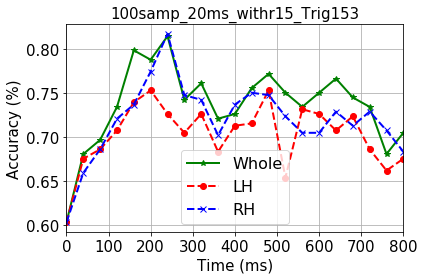

In [23]:
axis_font = {'fontname':'Arial', 'size':'15'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
tw1=a.iloc[0:,0];Acdw=a.iloc[0:,1];Acdlh=a.iloc[0:,2];Acdrh=a.iloc[0:,3]
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdlh,'--r',linewidth=2,marker='o')
plt.plot(tw1, Acdrh,'--b',linewidth=2,marker='x')
# plt.title(str(sam)+"samp_"+str(win)+"ms_"+str(nt)+"Trig"+str(trig))
plt.title(fti,**axis_font)
plt.xlim(0,800)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
plt.xlabel('Time (ms)',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
# plt.title('Whole brain',**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Whole','LH','RH'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()

In [24]:
len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

64.56375838926175

In [25]:
# dall

In [26]:
X_train.shape

(1490, 714)

In [27]:
# wpath="/home/sultan/EEG/Source_Level_Analysis/SVM_results/"
# dall=a
# dall.to_csv(wpath+'svm_res_100sam_10ms_clear_v2.csv')